In [1]:
# sys
import os
import os.path as op
import sys

# basics
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

# dev library
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..'))

# dependencies
from lib import plot_sat, sat, io
from lib.config import *

# warnings
import warnings
warnings.filterwarnings("ignore")

# Selection of CFOSAT passes over the ESTELA area

These notebooks show how the combination of 2D wave spectra from SWIM on-board instrument acquired over user-defined area and time extent, can be used for the observation and forecast of ocean swell fields reaching a target location. 

Mean wave parameters obtained from the integration of the pointing-sector SWIM wave slope spectrum are used to propagate forewards the energy

Evaluation of Source of wave Energy reaching a Local Area method from Perez et al., (2014), identifies the relevant amount of energy directed along great circle arcs toward the study site using the partitioned wave spectra from CAWCR hindcast at a global scale

## Mask evaluation soure

In [2]:
est = xr.open_dataset(op.join(p_data,'Estela_samoa.nc'), decode_times=False)

est = est.sel(time='ALL')
est = est.assign({'estela_mask':(('latitude','longitude'),np.where(est.F.values>0,1,np.nan))})
estela_mask = est.estela_mask # mask for slp

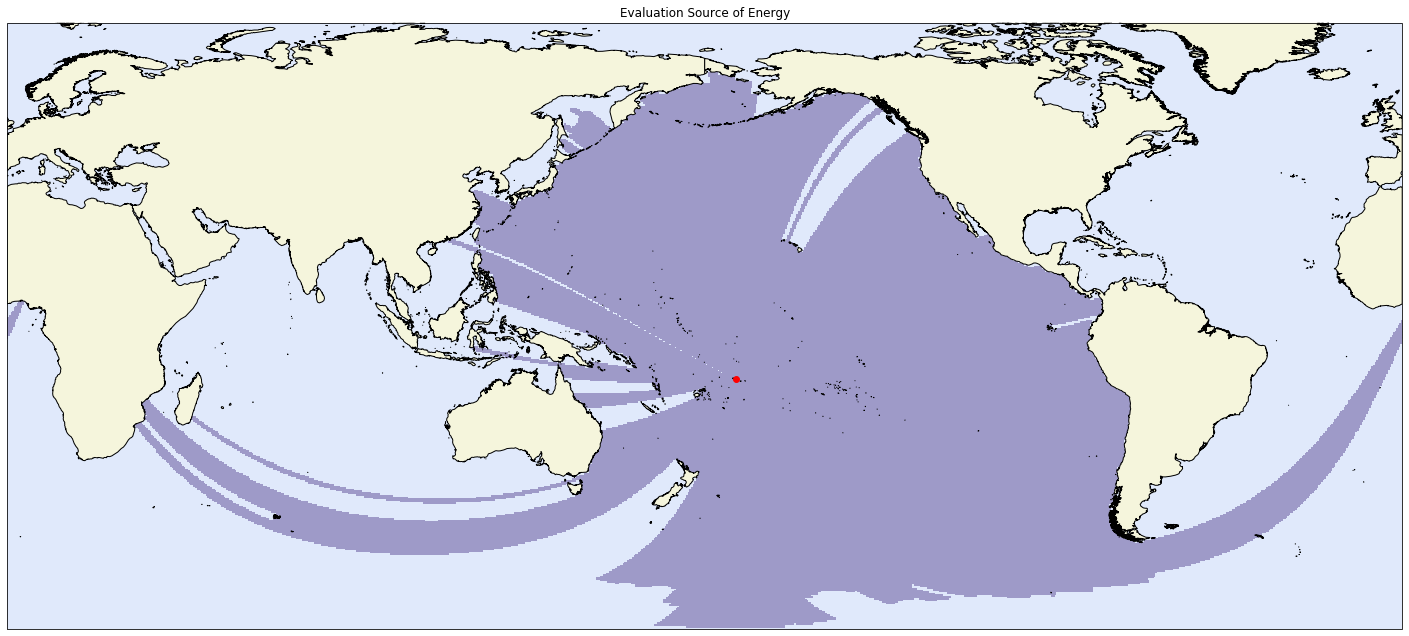

In [3]:
figsize = (25,15)
title = 'Evaluation Source of Energy'
fig, ax = plot_sat.estela_map(figsize, title, estela_mask)

## Select last days passes

In [3]:
dayYear = forecast_day.strftime('%j')

In [9]:
files_sort = np.sort(os.listdir(sat_cfosat))
p = np.where(files_sort == dayYear)[0][0]
folders = [op.join(sat_cfosat, i) for i in files_sort[p-n_days:p]]
files = [os.listdir(fdi) for fdi in folders]
files = np.concatenate(files)
df_data = io.load_files(files)

## Load satellite track time-lags and starting time

In [11]:
offs = io.load_timelags(estela_mask)

In [12]:
tracks = io.load_tracks()

## Obtain the pass over date & time

In [13]:
# We obtain the pass over date & time by adding the T0 value
ixs = []
for pi, t_cycle in enumerate(tracks.index.values):
    for pj, t_off in enumerate(offs):
        time = t_cycle + np.array([t_off], dtype="timedelta64[ms]")[0]
        sel_files = df_data.loc[np.where((df_data.dates_st < time) & (df_data.dates_ed > time))]

        if len(sel_files) > 0:
            ixs.append(sel_files.index.values[0])

ixs = np.sort(np.unique(ixs))
print('Files found\n')
print(df_data['name'][ixs].head())

Files found

0    CFO_OP05_SWI_L2_____F_20210521T072354_20210521...
1    CFO_OP05_SWI_L2_____F_20210521T103033_20210521...
3    CFO_OP05_SWI_L2_____F_20210521T200143_20210521...
4    CFO_OP05_SWI_L2_____F_20210521T213436_20210521...
6    CFO_OP05_SWI_L2_____F_20210521T005442_20210521...
Name: name, dtype: object


In [14]:
df_sel = df_data.loc[ixs]
df_sel.to_pickle(op.join(p_data, 'CFO_region.pkl'))
df_sel

name            dates_st  \
0    CFO_OP05_SWI_L2_____F_20210521T072354_20210521... 2021-05-21 07:23:54   
1    CFO_OP05_SWI_L2_____F_20210521T103033_20210521... 2021-05-21 10:30:33   
3    CFO_OP05_SWI_L2_____F_20210521T200143_20210521... 2021-05-21 20:01:43   
4    CFO_OP05_SWI_L2_____F_20210521T213436_20210521... 2021-05-21 21:34:36   
6    CFO_OP05_SWI_L2_____F_20210521T005442_20210521... 2021-05-21 00:54:42   
..                                                 ...                 ...   
175  CFO_OP05_SWI_L2_____F_20210530T052723_20210530... 2021-05-30 05:27:23   
176  CFO_OP05_SWI_L2_____F_20210530T032622_20210530... 2021-05-30 03:26:22   
177  CFO_OP05_SWI_L2_____F_20210530T064741_20210530... 2021-05-30 06:47:41   
178  CFO_OP05_SWI_L2_____F_20210530T160658_20210530... 2021-05-30 16:06:58   
179  CFO_OP05_SWI_L2_____F_20210530T205855_20210530... 2021-05-30 20:58:55   

               dates_ed  
0   2021-05-21 08:57:33  
1   2021-05-21 12:03:18  
3   2021-05-21 21:34:37  
4   2021-05-21 23:07:22  
6   2021-05-21 02:28:22  
..                  ...  
175 2021-05-30 06:47:42  
176 2021-05-30 05:12:59  
177 2021-05-30 08:21:37  
178 2021-05-30 17:17:48  
179 2021-05-30 22:31:41  

[148 rows x 3 columns]